# Opgave 1

Installer Anaconda osv...
Har installeret Jupyter så det kan bruges med PyCharm i stedet for :)

# Opgave 2

Brug datasættet `titanic_cleaned.csv`

In [30]:
import pandas as pd

In [31]:
data = pd.read_csv("./input/titanic_cleaned.csv")

Lav en EDA
 - Numerical
   - Head
   - Describe
   - Info
   - Keys

In [32]:
%matplotlib inline
data.head()

,Survived,Pclass,Sex,Age,Fare,Family_cnt,Cabin_ind
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


In [33]:
data.describe()

,Survived,Pclass,Sex,Age,Fare,Family_cnt,Cabin_ind
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,32.204208,0.904602,0.228956
std,0.486592,0.836071,0.477990,13.002015,49.693429,1.613459,0.420397
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,7.910400,0.000000,0.000000
50%,0.000000,3.000000,0.000000,29.699118,14.454200,0.000000,0.000000
75%,1.000000,3.000000,1.000000,35.000000,31.000000,1.000000,0.000000
max,1.000000,3.000000,1.000000,80.000000,512.329200,10.000000,1.000000


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Family_cnt  891 non-null    int64  
 6   Cabin_ind   891 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [35]:
data.keys()

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Family_cnt', 'Cabin_ind'], dtype='object')

Lav en EDA (fortsat)
 - Visual
   - Countplot (på survived)
   - Histogram (på age)
   - Correlation (på alle parametre)

In [36]:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

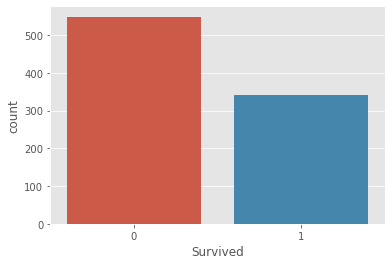

In [38]:
sns.countplot(y)

Correlation:

In [39]:
corr = data.corr()

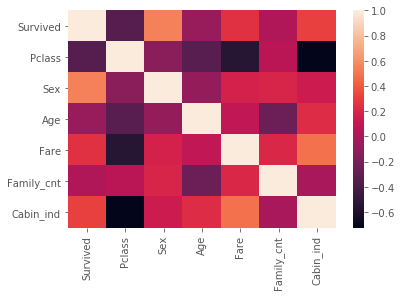

In [40]:
sns.heatmap(corr)

Histogram

In [41]:
plt.style.use('ggplot')

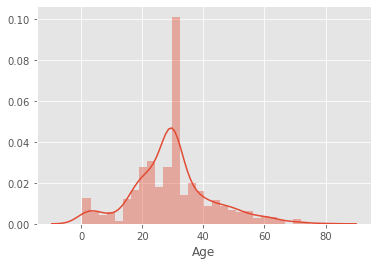

In [42]:
sns.distplot(data.Age)

In [43]:
import numpy as np
np.histogram(data.Age, bins=100)

(array([ 14,  10,   0,   6,  10,   4,   0,   3,   3,   4,   8,   0,   2,
          4,   1,   2,   0,   7,   5,  17,  13,   0,  26,  25,  15,  25,
          0,  27,  15,  31,  24,   0,  18,  18,  25,  22, 177,  27,  17,
         18,  17,   0,  16,  18,  22,   7,   0,  11,  14,  13,   8,   0,
         13,   5,   9,   0,  14,   3,   9,   9,   0,   6,  10,   7,   6,
          0,   1,   8,   2,   5,   0,   2,   5,   2,   4,   0,   3,   4,
          2,   2,   0,   3,   1,   0,   0,   0,   0,   2,   3,   0,   0,
          0,   1,   0,   0,   0,   0,   0,   0,   1], dtype=int64),
 array([ 0.42  ,  1.2158,  2.0116,  2.8074,  3.6032,  4.399 ,  5.1948,
         5.9906,  6.7864,  7.5822,  8.378 ,  9.1738,  9.9696, 10.7654,
        11.5612, 12.357 , 13.1528, 13.9486, 14.7444, 15.5402, 16.336 ,
        17.1318, 17.9276, 18.7234, 19.5192, 20.315 , 21.1108, 21.9066,
        22.7024, 23.4982, 24.294 , 25.0898, 25.8856, 26.6814, 27.4772,
        28.273 , 29.0688, 29.8646, 30.6604, 31.4562, 32.252 , 33.0

Hvilke andre slags visualiseringer kan man bruge og til hvilke features?

### Hvilken type problem er det? (classification/regression, binary/multiclass)?
- Classification - hvilken label passer til data
- Binary - der er kun to labels der kan sættes på data.

### Brug følgende algoritmer:
(med fit, predict og train_test_split)
- Knn
- Decision trees

Overvej hvilke andre algoritmer man kunne have valgt.

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)
dt = DecisionTreeClassifier()

In [46]:
knn.fit(X_train,y_train)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Mål performance på begge algoritmer:

In [47]:
print(knn.score(X_test,y_test))
print(dt.score(X_test,y_test))

0.7206703910614525
0.7653631284916201


Lav en 5-fold cross validation og sammenlign med de tidligere resultater

In [48]:
from sklearn.model_selection import cross_val_score
knn_results = cross_val_score(knn, X, y, cv=5)
dt_results = cross_val_score(dt, X, y, cv=5)
print(knn_results)
print(dt_results)

[0.6424581  0.69101124 0.7247191  0.75280899 0.71348315]
[0.7150838  0.76966292 0.85393258 0.78089888 0.82022472]


#### Forklar begreberne overfitting/underfitting

- Overfitting
Man har tilpasset modellen så den i høj grad vil passe på træningsdatasættet, men i mindre grad på ukendt data.

- Underfitting


### Forklar begrebet k-folds validation



# Opgave 3

Tag kolonnerne "area", "rooms" og "new price" from property-datasættet:

In [49]:
property_full = pd.read_csv("./input/property.csv")

In [50]:
property_full.head()

,Unnamed: 0,% difference,area,new price,old price,price difference,property area,rooms,type,zip code
0,0,-5 %,93 m²,6.500.000,6.200.000,-300.000,0 m²,2,Ejerlejlighed,1051 København K
1,1,-1 %,80 m²,4.150.000,4.100.000,-50.000,0 m²,2,Ejerlejlighed,1055 København K
2,2,-6 %,76 m²,4.800.000,4.495.000,-305.000,0 m²,3,Ejerlejlighed,1123 København K
3,3,-5 %,104 m²,6.650.000,6.295.000,-355.000,229 m²,3,Ejerlejlighed,1150 København K
4,4,-3 %,73 m²,3.350.000,3.250.000,-100.000,0 m²,2,Ejerlejlighed,1302 København K


In [51]:
columns_to_drop=['Unnamed: 0','% difference', 'old price', 'price difference', 'property area', 'type','zip code']

In [52]:
X = property_full.drop(columns=columns_to_drop)
X.head()

,area,new price,rooms
0,93 m²,6.500.000,2
1,80 m²,4.150.000,2
2,76 m²,4.800.000,3
3,104 m²,6.650.000,3
4,73 m²,3.350.000,2


Alternativ måde at importere på. Tager kun de kolonner fra csv-filen som der skal bruges:

In [53]:
columns_to_keep = ['area', 'new price', 'rooms']
X = pd.read_csv("property.csv", usecols=columns_to_keep)
X.head()

FileNotFoundError: [Errno 2] File property.csv does not exist: 'property.csv'

Konverter værdier til tal

In [ ]:
X['area'] = X['area'].str.replace(' m²','').astype('int64')
X['new price'] = X['new price'].str.replace('.','').astype('int64')

In [ ]:
X.info()

In [ ]:
y = X['new price'].values
X = X.drop('new price', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

In [ ]:
property_predict = reg.predict(X_test)

In [ ]:
import numpy as np
from sklearn.metrics import  mean_squared_error
np.sqrt(mean_squared_error(property_predict,y_test))

In [ ]:
X2 = property_full.drop(columns=['Unnamed: 0','% difference', 'old price', 'price difference', 'property area', 'zip code'])
X2.head()

In [ ]:
X2['area'] = X2['area'].str.replace(' m²','').astype('int64')
X2['new price'] = X2['new price'].str.replace('.','').astype('int64')

In [ ]:
type_property = pd.get_dummies(X2, drop_first=True)

In [ ]:
type_property.head()

In [ ]:
X2.head()

